In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values

In [ ]:
excluded_iso3_codes = [
    "IRL",  # Ireland
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "COG",  # Republic of the Congo
    "COD",  # Democratic Republic of the Congo
    "GIN",  # Guinea
    "GNB",  # Guinea-Bissau
    "GNQ",  # Equatorial Guinea
    "PNG",  # Papua New Guinea
    "XKX",  # Kosovo (unofficial)
    "MNE",  # Montenegro
    "SRB",  # Serbia
    "TLS"   # Timor-Leste
]

In [20]:
possible_iso=list(set(possible_countries)-set(excluded_iso3_codes))

In [22]:

Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
c_list=list(Country_list.values())
years=np.arange(2002, 2020, 1)
df=pd.read_csv(r"C:\Users\Yasaman\Arab_spring_scholarly_attention\Data\Migration\scopus_2024_V1_scholarlymigration_countryflows_enriched_new.csv")
df=df[df['year'].isin(years)].reset_index(drop=True)

In [23]:
religion_df=pd.read_csv(r'C:\Users\Yasaman\Arab_spring_scholarly_attention\Data\Religion\cleaned_religion.csv')
df=df.merge(religion_df, left_on='iso3codeto', right_on='name_iso')
df=df[df['name_iso'].isin(possible_iso)].reset_index(drop=True)

In [24]:

years_before=np.arange(2002, 2011, 1)
years_after=np.arange(2011, 2020, 1)
world_before=df[df['year'].isin(years_before)].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'world(Pre-Arabspring)'})
world_after=df[df['year'].isin(years_after)].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'world(Post-Arabspring)'})


target_before=df[(df['year'].isin(years_before))&(df['iso3codefrom'].isin(c_list))].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'Target(Pre-Arabspring)'})
target_after=df[(df['year'].isin(years_after))&(df['iso3codefrom'].isin(c_list))].groupby('most_religion')['n_migrations'].sum().reset_index().rename(columns={'n_migrations':'Target(Post-Arabspring)'})
res=world_after.merge(target_after).merge(world_before).merge(target_before)


In [25]:
for col in res.columns[1:]:
    res[col]/=sum(res[col])
res.index=res.most_religion
del res['most_religion']

res=res.transpose().reset_index()

In [26]:
res

most_religion,index,Buddhism,Christianity,Hindu,Islam,Judaism,Non. Religious,Shinto,Syncretic Religions
0,world(Post-Arabspring),0.020019,0.748863,0.022131,0.085525,0.007426,0.023536,0.024675,0.067825
1,Target(Post-Arabspring),0.003177,0.472428,0.017838,0.461921,0.000896,0.007901,0.021259,0.014580
2,world(Pre-Arabspring),0.016325,0.809215,0.016516,0.051439,0.007575,0.023850,0.036457,0.038624
3,Target(Pre-Arabspring),0.002890,0.598330,0.020067,0.334725,0.000963,0.006422,0.031947,0.004656


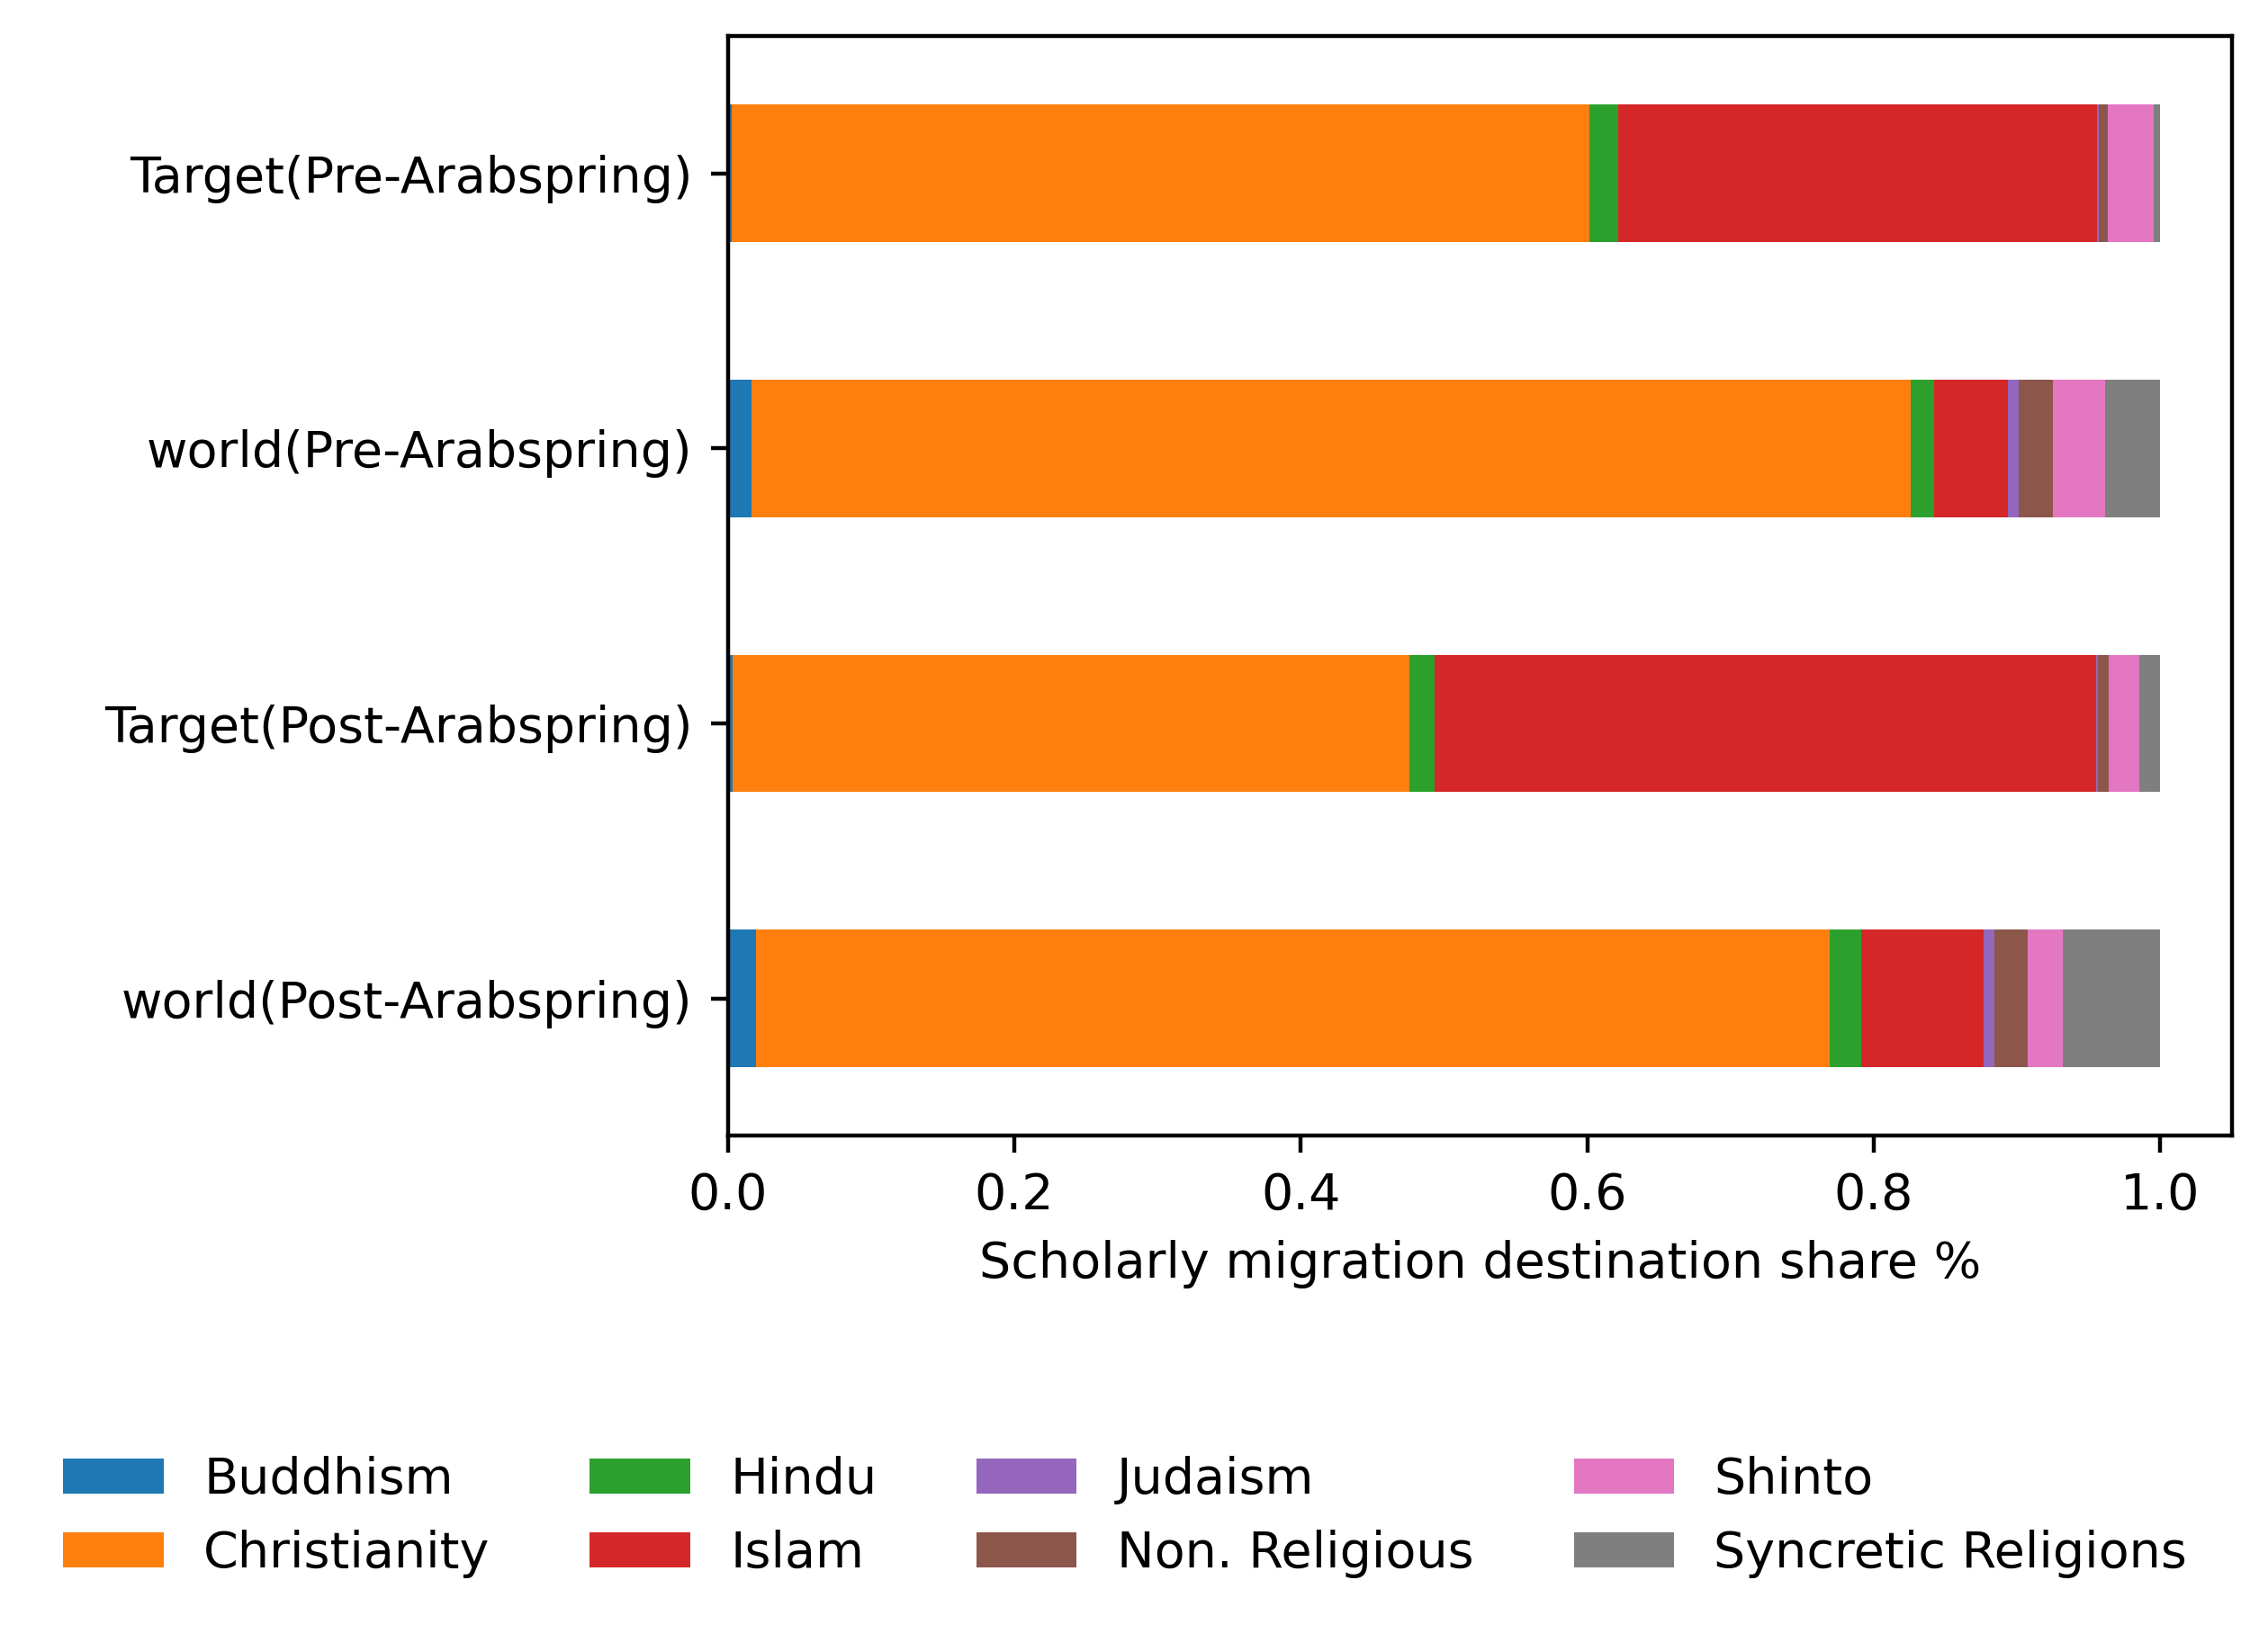

In [27]:
fig, ax=plt.subplots(nrows=1, ncols=1, dpi=400)
res.plot(x='index', kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Scholarly migration destination share %')
ax.set_ylabel(' ')
# Put the legend outside the plot area
lgd=ax.legend( bbox_to_anchor=(1, -.25), ncol=4, frameon=False)
fig.tight_layout()
fig.savefig('Religion_and_migration.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')